In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [2]:
df = pd.read_csv('Datasets/train.csv')

# 1. How big is the data?

In [3]:
df.shape

(891, 12)

# 2. How does the data look like?

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


# 3. What is the data type of cols?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Are there any missing values?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Show missing vlaue in percentage order

In [7]:
num_of_null_value = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum() / len(df) * 100 ).sort_values(ascending=False)

missing_df = pd.concat(objs=[num_of_null_value, percentage], axis=1, keys=['Total null value', 'Percentage of null value'])
missing_df

,Total null value,Percentage of null value
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# Show missing value using klib module

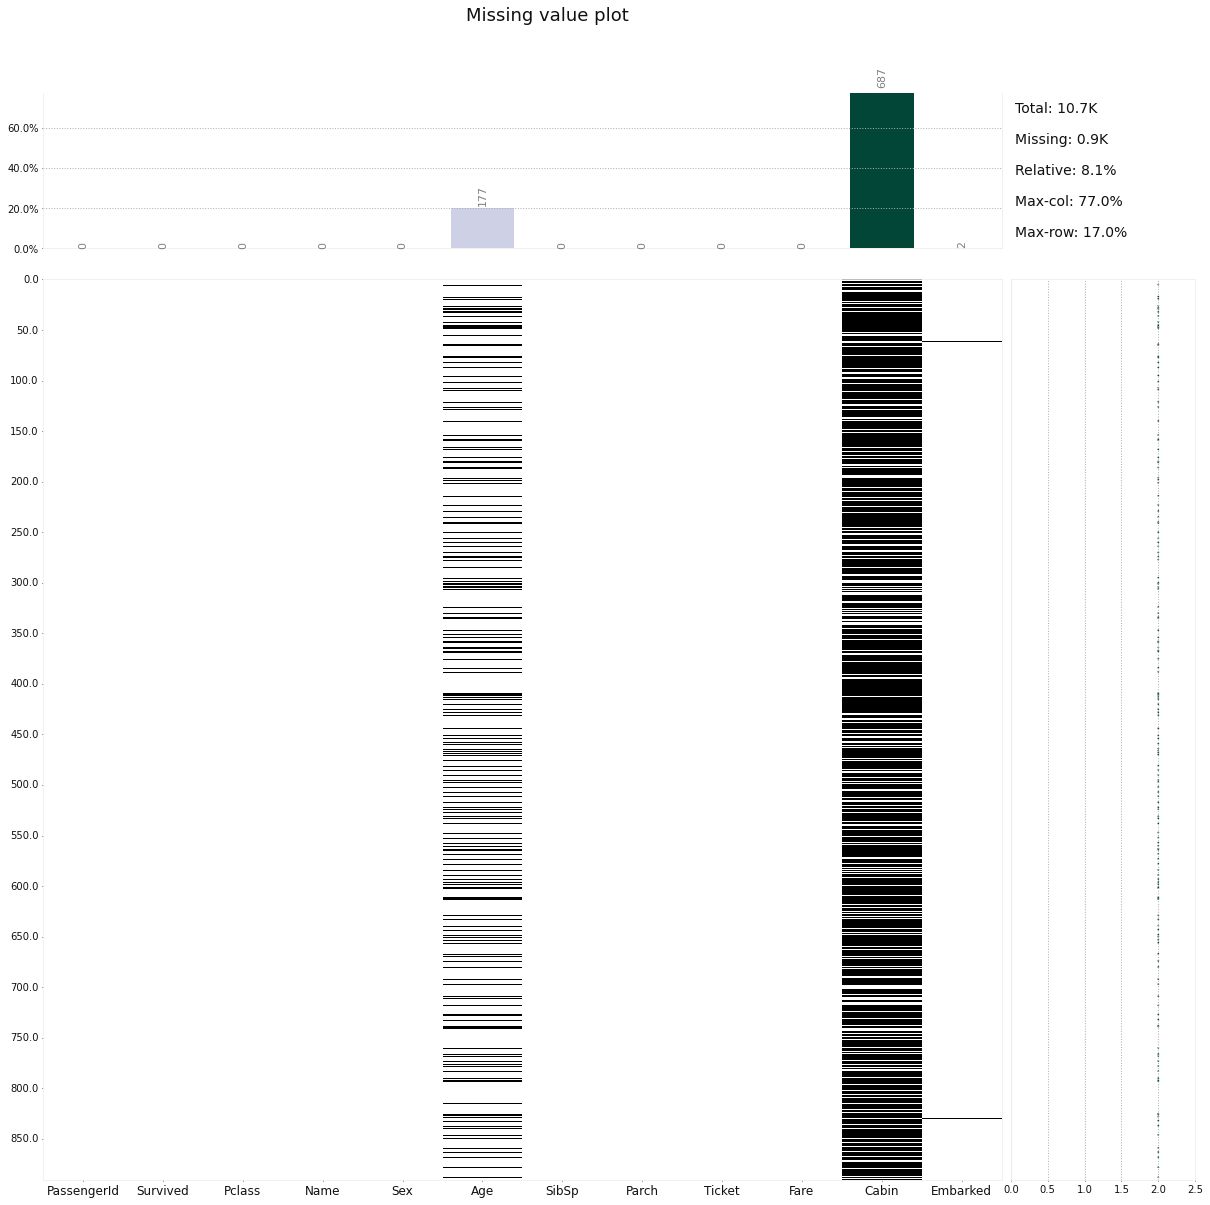

In [8]:
klib.missingval_plot(data=df)
plt.show()

# Check the target data is balence or not

Percentage for defalult

0    61.62
1    38.38
Name: Survived, dtype: float64


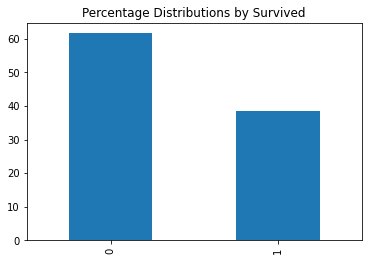

In [9]:
print("Percentage for defalult\n")
print(round(df["Survived"].value_counts(normalize=True)*100, 2))
round(df["Survived"].value_counts(normalize=True)*100, 2).plot(kind="bar")
plt.title("Percentage Distributions by Survived")
plt.show()

# 5. How does the data look mathematically?

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 6. Are there duplicate values?

In [11]:
df.duplicated().sum()

0

# 7. How is the correlation between cols?

In [12]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Univariate Analysis

## For categorical Data

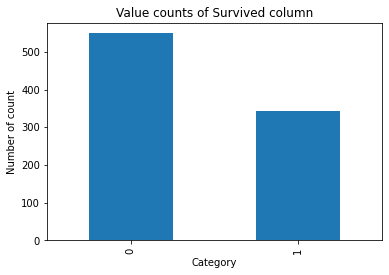

In [13]:
# For Embarked and Survived columns
# Plot using pandas plot() function

df['Survived'].value_counts().plot(kind='bar')
plt.title("Value counts of Survived column")
plt.xlabel("Category")
plt.ylabel("Number of count")
plt.show()

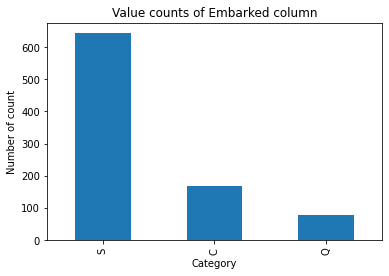

In [14]:
df['Embarked'].value_counts().plot(kind='bar')
plt.title("Value counts of Embarked column")
plt.xlabel("Category")
plt.ylabel("Number of count")
plt.show()

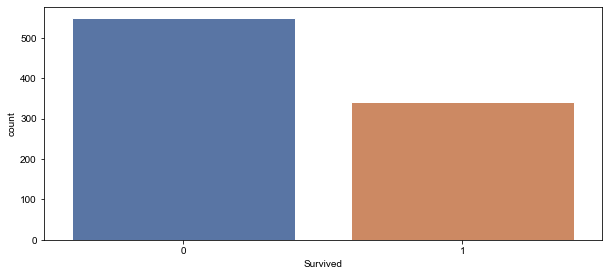

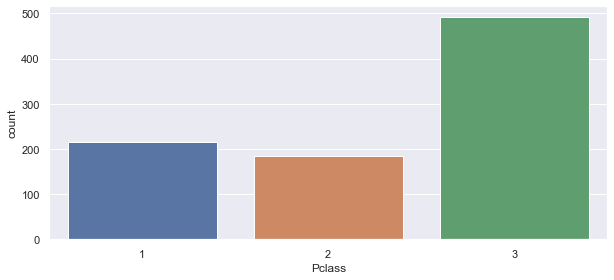

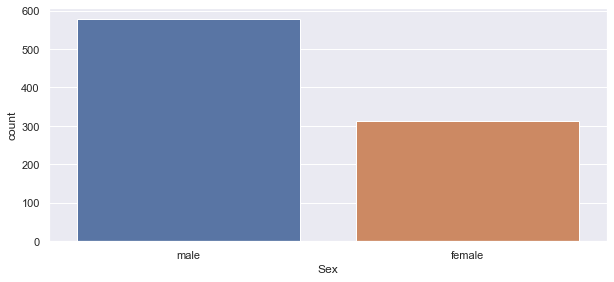

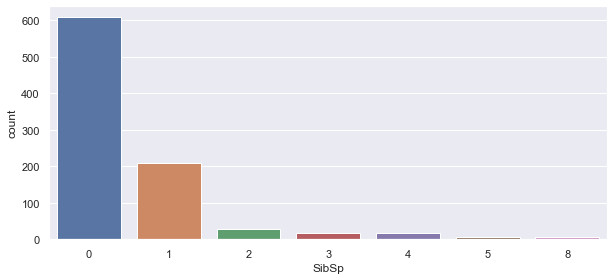

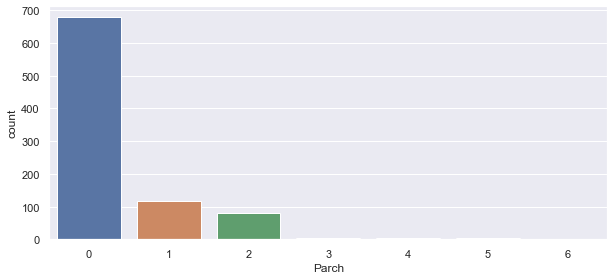

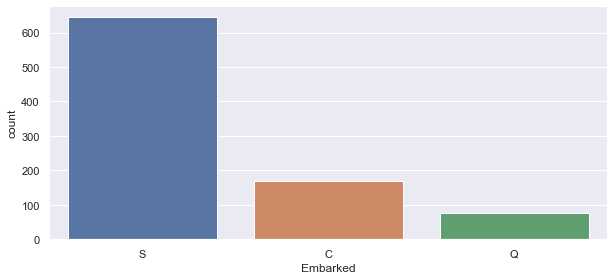

In [15]:
# All categorical columns

column_list = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']

# Visualization using seaborn
for i, item in enumerate(column_list):
    plt.figure(figsize=(10,30))
    plt.subplot(len(column_list), 1, i+1)
    sns.set_theme()
    sns.countplot(x=item, data=df)
    plt.show()

## Using pandas pi chart

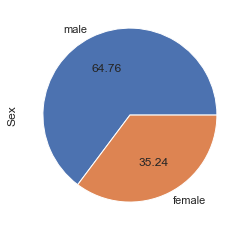

In [16]:
# For sex column

df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

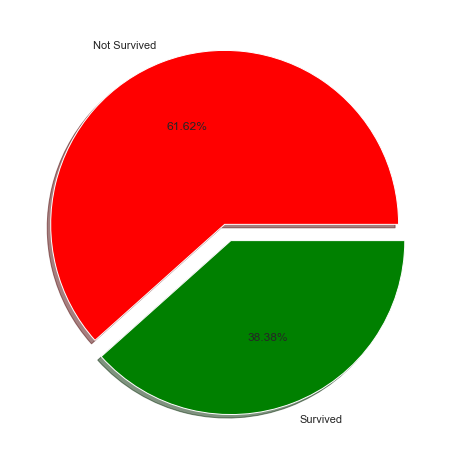

In [17]:
# For Survived class

plt.figure(figsize=(8,8))
plt.pie(x=df['Survived'].value_counts(), 
        explode=[0, 0.1],labels=["Not Survived", "Survived"], 
        colors=["Red", "Green"],
        data=df, 
        autopct="%.2f%%", 
        shadow=True)

plt.show()

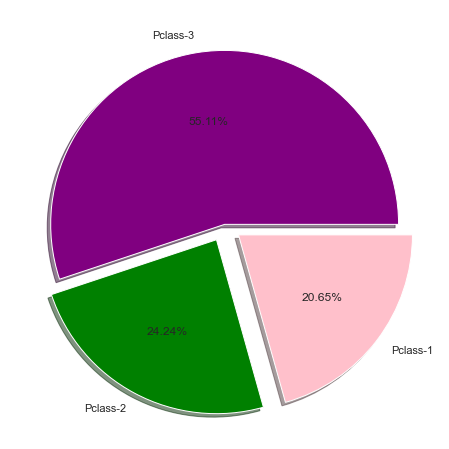

In [18]:
# For Pclass class

plt.figure(figsize=(8,8))
plt.pie(x=df['Pclass'].value_counts(), 
        explode=[0, 0.1, 0.1],labels=["Pclass-3", "Pclass-2", "Pclass-1"], 
        colors=["purple", "Green", "pink"],
        data=df, 
        autopct="%.2f%%", 
        shadow=True)

plt.show()

## For Numerical Data

### histogram

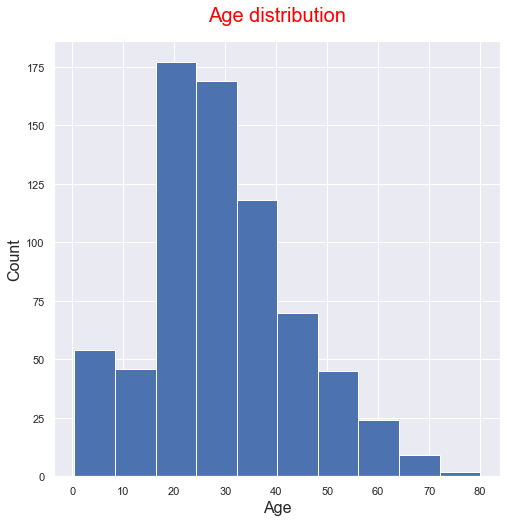

In [19]:
# Without bins

plt.figure(figsize=(8, 8))
plt.hist(x="Age", data=df)
plt.title("Age distribution", color="Red", fontsize=20, pad=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

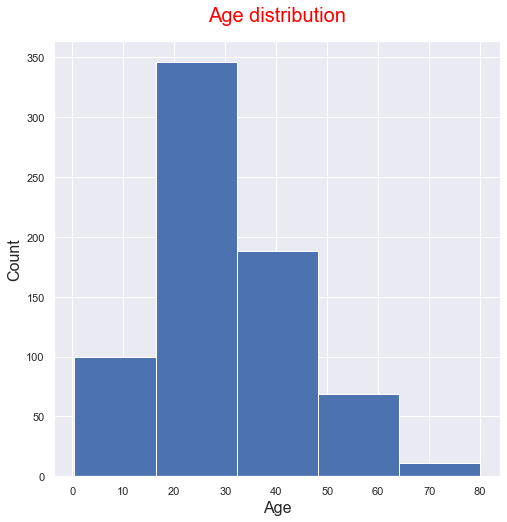

In [20]:
# With bins

plt.figure(figsize=(8, 8))
plt.hist(x="Age", bins=5 ,data=df)
plt.title("Age distribution", color="Red", fontsize=20, pad=20)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### Distplot

<Figure size 576x576 with 0 Axes>

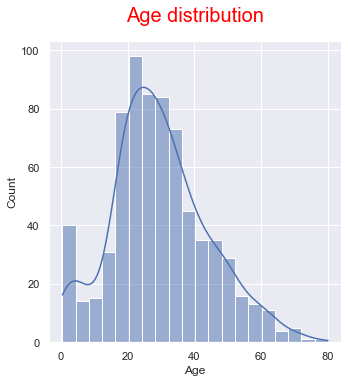

In [21]:
plt.figure(figsize=(8, 8))
sns.displot(data=df, x="Age", kde=True)
plt.title("Age distribution", color="Red", fontsize=20, pad=20)
# plt.xlabel("Age", fontsize=16)
# plt.ylabel("Count", fontsize=16)
plt.show()

### boxplot

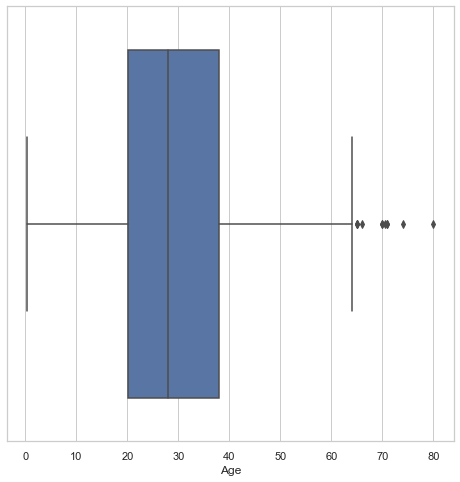

In [22]:
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df)
plt.show()

In [23]:
df["Age"].skew()

0.38910778230082704